# Preprocessing HURDAT2 data

Hurdat data is in an odd format.  The header information needs to be explicitly defined using the following code.  

Pandas can read a lot of text formats from a url.  In this case, it directly downloads it from the NHC site.  

Please be careful when doing this and be courteous of the website host. Never put such a thing into a loop, as this will stress the remote server.  If you want to redownload the data, delete the "hurdat_raw.csv" file from the `hurdat/data/` folder

NOTE: df.head(25) simply prints out the first 25 rows.

In [1]:
import pandas as pd
import numpy as np
import os

headers = ['date','time','record_id','status','latitude','longitude','max_wind','min_pressure',
           'ne34ktr','se34ktr','sw34ktr','nw34ktr','ne50ktr','se50ktr','sw50ktr','nw50ktr',
           'ne64ktr','se64ktr','sw64ktr','nw64ktr']


if not os.path.isfile("../data/hurdat_raw.csv"):
    url = 'https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2017-050118.txt'
    df = pd.read_csv(url, names=headers)
    df.to_csv("../data/hurdat_raw.csv", index=False)
else:
    df = pd.read_csv("../data/hurdat_raw.csv")
    

df.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,sw34ktr,nw34ktr,ne50ktr,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


The organization is that the unique identifier is its own row, and every row that comes after, until the next unique identifier row, are considered to be associated with that unique storm identifier.  This is not particularly useful for data analysis.

We first need to identify what rows are not observational data.  We can do this by checking to see if the first two characters in `date`. If they are not numbers, it is a row associated with a unique identifier.  Look at the first 25 values testing whether or not the characters are alphabetical and not numeric and compare this to the `df['date']` column above:

In [2]:
[[x[:2].isalpha() for x in df.date.values[:25]]]

[[True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False]]

Great! So those rows have 3 important data values within them:
    
```
identifier: unique identifier for each storm
name: name of the storm (if available)
num_pts: how many observational points are associated with each storm
```

We want to add these columns to our dataframe and set the initial values to `np.nan`:

In [3]:
df['identifier'] = np.nan
df['name'] = np.nan
df['num_pts'] = np.nan

df.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,...,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr,identifier,name,num_pts
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN


Next, we need to transfer the values to these new columns.  We are eventually going to remove the rows associated with the unique identifier.  The way to do this is to first get a numpy array of all of the `identifiers`, `names`, and `num_pts` to insert into the new columns:

In [4]:
identifiers = df[[x[:2].isalpha() for x in df.date.values]]['date']

name = df[[x[:2].isalpha() for x in df.date.values]]['time']

num_pts = df[[x[:2].isalpha() for x in df.date.values]]['record_id']

print(identifiers[:10])

0      AL011851
15     AL021851
17     AL031851
19     AL041851
69     AL051851
86     AL061851
104    AL011852
150    AL021852
159    AL031852
180    AL041852
Name: date, dtype: object


We can see the first 10 unique identifiers in the right column, and the rows in which those identifiers exist.  

We can use those positions to insert the values back into the dataframe using `df.loc`.  This is done by sending loc the positions of where we have identifiers using:

```
[x[:2].isalpha() for x in df.date.values]
```

Which is just a True/False list, and then specifying the column name.  In other words, you are telling pandas to insert the all the values in the list where the True/False list is true, and in the particular column. 

In [5]:
df.loc[[x[:2].isalpha() for x in df.date.values], 'identifier'] = identifiers
df.loc[[x[:2].isalpha() for x in df.date.values], 'name'] = name
df.loc[[x[:2].isalpha() for x in df.date.values], 'num_pts'] = num_pts

So lets take a look at what this looks like now:

In [6]:
df.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,...,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr,identifier,name,num_pts
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL011851,UNNAMED,14
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN


We see that now the unique identifier, name, and number of points are in the new columns at the far right, and then these are followed by `NaN`.  Pandas can fill in `NaN` values using `fillna` which can use a number of approaches.  The approach we will use is called `ffill`, which is short for forward fill.  For the particular column, this will take the value and insert it into every row until you hit a non-`NaN` value, and then repeat this process.

In [7]:
df['identifier'].fillna(method='ffill', inplace=True)
df['name'].fillna(method='ffill', inplace=True)
df['num_pts'].fillna(method='ffill', inplace=True)

Let's examine the new columns now:

In [8]:
df.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,...,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr,identifier,name,num_pts
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL011851,UNNAMED,14
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14


Now, each row is associated with the unique identifier.  We can remove the identifier rows by instead checking if the first two characters are numeric.  This will return a new dataframe with the identifier rows removed:

In [9]:
df_storms = df[[x[:2].isnumeric() for x in df.date.values]].copy()

df_storms.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,...,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr,identifier,name,num_pts
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14
10,18510627,0000,,TS,29.0N,99.4W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AL011851,UNNAMED,14


For easy queries and usage in Python, you can parse out the date and time information and put them into their own rows.

In [10]:
import datetime

yr = [int(x[:4]) for x in df_storms.date.values]
mo = [int(x[4:6]) for x in df_storms.date.values]
dy = [int(x[6:8]) for x in df_storms.date.values]
hr = [int(x[:3]) for x in df_storms.time.values]

df_storms['year'] = yr
df_storms['month'] = mo
df_storms['day'] = dy
df_storms['hour'] = hr

df_storms['datetime'] = pd.to_datetime(df_storms[['year', 'month', 'day', 'hour']])

df_storms.head(25)

,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,...,sw64ktr,nw64ktr,identifier,name,num_pts,year,month,day,hour,datetime
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,25,0,1851-06-25 00:00:00
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,25,6,1851-06-25 06:00:00
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,25,12,1851-06-25 12:00:00
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,25,18,1851-06-25 18:00:00
5,18510625,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,25,21,1851-06-25 21:00:00
6,18510626,0000,,HU,28.2N,97.0W,70.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,26,0,1851-06-26 00:00:00
7,18510626,0600,,TS,28.3N,97.6W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,26,6,1851-06-26 06:00:00
8,18510626,1200,,TS,28.4N,98.3W,60.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,26,12,1851-06-26 12:00:00
9,18510626,1800,,TS,28.6N,98.9W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,26,18,1851-06-26 18:00:00
10,18510627,0000,,TS,29.0N,99.4W,50.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,AL011851,UNNAMED,14,1851,6,27,0,1851-06-27 00:00:00


We can easily reorganize the columns by passing in the desired order as a list:

In [11]:
df_storms = df_storms[['identifier', 'name', 'num_pts', 'year', 'month',
                       'day', 'hour', 'datetime', 'date', 'time', 'record_id', 
                       'status', 'latitude', 'longitude', 'max_wind', 
                       'min_pressure', 'ne34ktr', 'se34ktr', 'sw34ktr', 'nw34ktr',
                       'ne50ktr', 'se50ktr', 'sw50ktr', 'nw50ktr', 'ne64ktr', 'se64ktr',
                       'sw64ktr', 'nw64ktr']]

In many cases, there is an abundance of random whitespace that foils many pandas queries.

In [12]:
df_storms.name.values[500]

'            UNNAMED'

Yuck! We can use `DataFrame.str.strip()` to remove the whitespace from selected rows.

In [13]:
df_storms['name'] = df_storms['name'].apply(lambda x: x.strip())
df_storms['num_pts'] = df_storms['num_pts'].apply(lambda x: x.strip())
df_storms['status'] = df_storms['status'].apply(lambda x: x.strip())
df_storms['latitude'] = df_storms['latitude'].apply(lambda x: x.strip())
df_storms['longitude'] = df_storms['longitude'].apply(lambda x: x.strip())

df_storms.name.values[500]

'UNNAMED'

The latitudes and longitudes are not very useful in their current form, so we can turn them into floating point numbers.

Note: This approach will work for transforming hurricane locations into $+/-$ latitudes and longitudes anywhere on globe.

In [14]:
is_south = [x[-1]=='S' for x in df_storms['latitude']]
is_west = [x[-1]=='W' for x in df_storms['longitude']]

df_storms['lat_f'] = [float(x[:-1]) for x in df_storms['latitude']]
df_storms['lon_f'] = [float(x[:-1]) for x in df_storms['longitude']]

df_storms.loc[is_south, 'lat_f'] *= -1
df_storms.loc[is_west, 'lon_f'] *= -1

df_storms[['latitude', 'lat_f', 'longitude', 'lon_f']].head()

,latitude,lat_f,longitude,lon_f
1,28.0N,28.0,94.8W,-94.8
2,28.0N,28.0,95.4W,-95.4
3,28.0N,28.0,96.0W,-96.0
4,28.1N,28.1,96.5W,-96.5
5,28.2N,28.2,96.8W,-96.8


We can also categorize the storms based on their wind speed and the <a href=https://en.wikipedia.org/wiki/Saffir%E2%80%93Simpson_scale>Saffir-Simpson Scale</a>

In [15]:
df_storms['TS'] = df_storms.max_wind >= 34
df_storms['CAT1'] = df_storms.max_wind >= 64
df_storms['CAT2'] = df_storms.max_wind >= 83
df_storms['CAT3'] = df_storms.max_wind >= 96
df_storms['CAT4'] = df_storms.max_wind >= 113
df_storms['CAT5'] = df_storms.max_wind >= 137

One thing to note is that the storms may have become extratropical but still have Category 1, Category 2, etc., strength on the Saffir-Simpson Scale.  You can use a `TROP` boolean to check to make sure the `status` is hurricane or tropical storm.

In [16]:
df_storms['TROP'] = (df_storms.status=='HU') | (df_storms.status=='TS')

We can get counts of major hurricanes using a combination of `groupby` and `count`.

In [17]:
df_storms[df_storms.TROP].groupby('CAT3')['identifier'].nunique()

CAT3
False    1576
True      316
Name: identifier, dtype: int64

Count of hurricanes that happened in each year using groupby and count.

In [18]:
df_storms[(df_storms.CAT1) & (df_storms.TROP)].groupby('year')['identifier'].nunique()

year
1851     3
1852     5
1853     4
1854     3
1855     4
1856     4
1857     3
1858     6
1859     7
1860     6
1861     6
1862     3
1863     5
1864     3
1865     3
1866     6
1867     7
1868     3
1869     7
1870    10
1871     6
1872     4
1873     3
1874     4
1875     5
1876     4
1877     3
1878    10
1879     6
1880     9
        ..
1988     5
1989     7
1990     8
1991     4
1992     4
1993     4
1994     3
1995    11
1996     9
1997     3
1998    10
1999     8
2000     8
2001     9
2002     4
2003     7
2004     9
2005    15
2006     5
2007     6
2008     8
2009     3
2010    12
2011     7
2012    10
2013     2
2014     6
2015     4
2016     7
2017    10
Name: identifier, Length: 165, dtype: int64

You can even count how many storms with at least tropical storm wind intensity had particular wind speeds.

In [19]:
df_storms[df_storms.TS].groupby('max_wind')['identifier'].nunique()

max_wind
35.0     1214
40.0     1318
45.0     1124
50.0     1176
55.0      850
60.0      911
65.0      698
70.0      783
75.0      522
80.0      560
85.0      403
90.0      431
95.0      278
100.0     281
105.0     194
110.0     172
115.0     121
120.0     108
125.0      74
130.0      53
135.0      34
140.0      30
145.0      18
150.0      16
155.0       5
160.0       3
165.0       1
Name: identifier, dtype: int64

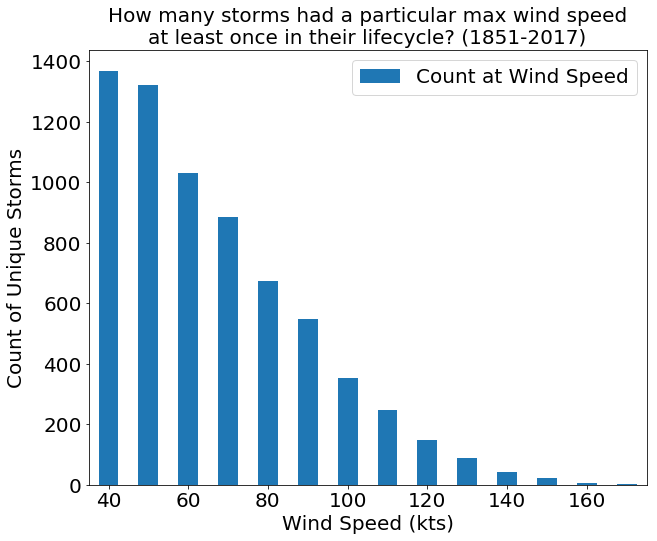

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

df_storms['max_wind_10kts'] = 10*(np.ceil(df_storms.max_wind/10))

series = df_storms[df_storms.TROP].groupby('max_wind_10kts')['identifier'].nunique()
plt.bar(series.index, series.values, width=5, label="Count at Wind Speed")

plt.xlim(np.min(series.index.values)-5, np.max(series.index.values)+5)

plt.ylabel("Count of Unique Storms")
plt.xlabel("Wind Speed (kts)")
plt.title("How many storms had a particular max wind speed\nat least once in their lifecycle? (1851-2017)")
plt.legend()

Finally, now that you have examined the data and think it looks ok, you can output the resulting csv to use later:

In [21]:
df_storms.to_csv("../data/hurdat2_cleaned.csv", index=False)